In [2]:
!pip install python-binance
from binance import Client
import pandas as pd

     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 288 kB 13.9 MB/s 
     |████████████████████████████████| 103 kB 51.9 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 55.8 MB/s 
     |████████████████████████████████| 271 kB 65.0 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 144 kB 63.2 MB/s 


In [39]:
#%run /content/drive/MyDrive/Colab_Notebooks/binance_test_key.ipynb
import json
api_key = ''
api_secret = ''
with open('binance_test_key.json', 'r') as file_to_read:
    json_data = json.load(file_to_read)
    api_key = json_data["api_key"]
    api_secret = json_data["api_secret"]
#import os
#print(os.environ.get('api_key'))
#api_key = os.environ.get('api_key')
#api_secret = os.environ.get('api_secret')
client = Client(api_key,api_secret)
client.API_URL = 'https://testnet.binance.vision/api'
ac = pd.DataFrame(client.get_account()['balances'])
ac
#client.get_asset_balance(asset='BTC')

,asset,free,locked
0,BNB,1000.00000000,0.00000000
1,BTC,1.00200000,0.00000000
2,BUSD,10000.00000000,0.00000000
3,ETH,100.00000000,0.00000000
4,LTC,500.00000000,0.00000000
5,TRX,500000.00000000,0.00000000
6,USDT,9928.42088000,0.00000000
7,XRP,50000.00000000,0.00000000


In [44]:
from google.colab import files
uploaded = files.upload() # Upload a csv file named: position
import io
#posframe = pd.read_csv(io.BytesIO(uploaded['position.csv'])) 
posframe = pd.read_csv('position.csv') # Dataset is now stored in a Pandas Dataframe
posframe

Saving position.csv to position.csv


,Currency,position,quantity
0,BTCUSDT,0,0.002
1,ETHUSDT,0,0.200
2,XRPUSDT,0,20.000


In [21]:
def changePos(curr, buy=True):
  if buy:
    posframe.loc[posframe.Currency == curr, 'position'] = 1
  else:
    posframe.loc[posframe.Currency == curr, 'position'] = 0
  posframe.to_csv('/content/position.csv') 

In [22]:
def getHourlyData(symbol):
  frame = pd.DataFrame(client.get_historical_klines(symbol,'1h','25 hours ago UTC'))
  frame = frame.iloc[:,:6]
  frame.columns = ['Time','Open','High','Low','Close','Volume']
  frame[['Open','High','Low','Close','Volume']] = frame[['Open','High','Low','Close','Volume']].astype(float)
  frame.Time = pd.to_datetime(frame.Time,unit='ms')
  frame.set_index(['Time'],inplace=True)
  global getting_symbol
  getting_symbol = symbol
  return frame

In [ ]:
#files.download('position.csv') 

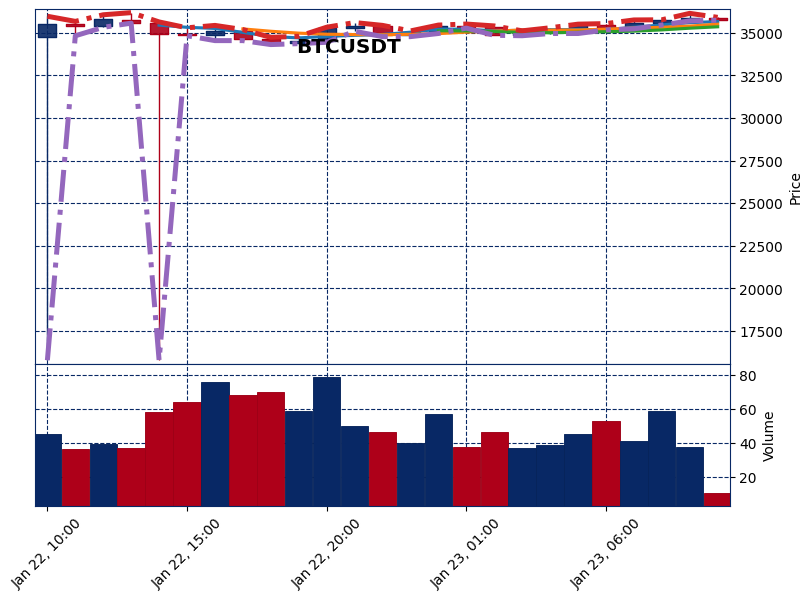

In [26]:
!pip install --upgrade mplfinance
import mplfinance as mpf
import matplotlib.pyplot as plt
klines = getHourlyData('BTCUSDT')
add_plot = [
            mpf.make_addplot(klines[['High','Low']],linestyle='dashdot')
            #mpf.make_addplot(klines['percentB'],panel='lower',color='g',secandary_y='auto')
]
mpf.plot(klines,addplot=add_plot ,type = 'candle',figscale=1.0, style = 'sas' ,tight_layout=True,title=getting_symbol, mav = (5,8,15),volume = True)

In [27]:
df = getHourlyData('BTCUSDT')
def applyTechnicals(df):
  df['FastSMA'] = df.Close.rolling(7).mean()
  df['SlowSMA'] = df.Close.rolling(25).mean()

In [28]:
applyTechnicals(df)
df

,Open,High,Low,Close,Volume,FastSMA,SlowSMA
Time,,,,,,,
2022-01-22 10:00:00,34764.35,35963.97,15786.12,35488.54,44.999191,NaN,NaN
2022-01-22 11:00:00,35488.54,35663.47,34818.80,35413.73,36.442673,NaN,NaN
2022-01-22 12:00:00,35408.43,36051.16,35315.53,35791.85,39.224473,NaN,NaN
2022-01-22 13:00:00,35769.80,36176.35,35557.79,35574.36,36.968836,NaN,NaN
2022-01-22 14:00:00,35576.30,35630.74,15786.12,34951.99,58.136869,NaN,NaN
2022-01-22 15:00:00,34951.99,35285.57,34821.17,34847.30,63.805428,NaN,NaN
2022-01-22 16:00:00,34840.86,35427.01,34535.06,35083.29,75.826878,35307.294286,NaN
2022-01-22 17:00:00,35083.29,35182.23,34535.06,34626.40,68.329630,35184.131429,NaN
2022-01-22 18:00:00,34614.63,34724.67,34302.75,34383.61,70.103410,35036.971429,NaN


In [45]:
def trader(curr):
  qty = posframe[posframe.Currency == curr].quantity.values[0]
  df = getHourlyData(curr)
  applyTechnicals(df)
  lastrow = df.iloc[-1]
  if not posframe[posframe.Currency == curr].position.values[0]:
    if lastrow.FastSMA > lastrow.SlowSMA:
      order = client.create_order(symbol=curr,side='BUY',type='MARKET',quantity=qty)
      print(order)
      changePos(curr,buy=True)
    else:
      print(f'Not in position {curr} but Condition not fulfilled')
  else:
    print(f'Already in {curr} position')
    if lastrow.SlowSMA > lastrow.FastSMA:
      order = client.create_order(symbol=curr,side='SELL',type='MARKET',quantity=qty)
      print(order)
      changePos(curr,buy=False)

In [46]:
for coin in posframe.Currency:
  trader(coin)

{'symbol': 'BTCUSDT', 'orderId': 9364304, 'orderListId': -1, 'clientOrderId': 'nAn6BDIgizEF8D4IYcpXVB', 'transactTime': 1642935017023, 'price': '0.00000000', 'origQty': '0.00200000', 'executedQty': '0.00200000', 'cummulativeQuoteQty': '71.60570000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '35802.85000000', 'qty': '0.00200000', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 2047633}]}
{'symbol': 'ETHUSDT', 'orderId': 105235, 'orderListId': -1, 'clientOrderId': 'c1OVvZNtwnVgQjS0T7gfgx', 'transactTime': 1642935017998, 'price': '0.00000000', 'origQty': '0.20000000', 'executedQty': '0.20000000', 'cummulativeQuoteQty': '149.89042320', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '746.85000000', 'qty': '0.13429000', 'commission': '0.00000000', 'commissionAsset': 'ETH', 'tradeId': 48365}, {'price': '754.77000000', 'qty': '0.06571000', 'commission': '0.00000000', 'commissio

In [47]:
posframe

,Currency,position,quantity
0,BTCUSDT,1,0.002
1,ETHUSDT,1,0.200
2,XRPUSDT,0,20.000
